In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

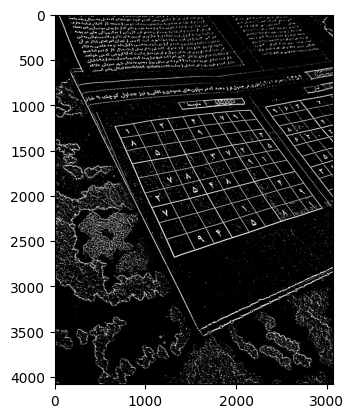

In [3]:
org_img = cv.imread('kaj.jpg')
img = cv.cvtColor(org_img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img, (7,7), 3)
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 17, 2)

plt.imshow(img, 'gray')

In [4]:
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

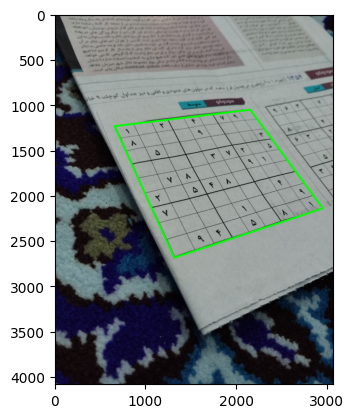

In [5]:
contours = sorted(contours, key=cv.contourArea, reverse=True)

for contour in contours:
    epsilon = .02 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        cv.drawContours(org_img, [approx], -1, (0,255,0), 20)
        break
plt.imshow(org_img)